### Crop Yield Prediction 🌾📈

#### STEP 1: DATA COLLECTION AND DATA LOADING
##### The dataset is collected from the kaggle : https://www.bing.com/ck/a?!&&p=f49b25b6112e96d7863449ffae50e89b61d0a63e0cd7d24de4b6cd7d806fcaf3JmltdHM9MTc0MjM0MjQwMA&ptn=3&ver=2&hsh=4&fclid=3ecb5df1-9176-6fef-36a0-4e9090706e44&psq=crop+yeild+datselt&u=a1aHR0cHM6Ly93d3cua2FnZ2xlLmNvbS9kYXRhc2V0cy9ha3NoYXRndXB0YTcvY3JvcC15aWVsZC1pbi1pbmRpYW4tc3RhdGVzLWRhdGFzZXQ&ntb=1

In [1]:
import pandas as pd
df=pd.read_excel(r"E:\komal\crop_yeild\crop_yield_data.xlsx")
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Groundnut,2004,Summer,Maharashtra,69400.000000,100200.000000,1052.000000,7.518796e+06,14574.000000,1.313871
1,Groundnut,2015,Summer,Gujarat,57421.000000,95577.000000,584.300000,9.067350e+06,18948.930000,1.685926
2,Groundnut,2016,Kharif,Uttarakhand,935.000000,1214.000000,1580.900000,1.432888e+05,327.250000,1.296000
3,Groundnut,2001,Kharif,Kerala,2437.000000,1812.000000,2946.700000,2.488908e+05,633.620000,0.740000
4,Groundnut,2007,Kharif,Tripura,409.000000,423.000000,2831.800000,5.456060e+04,65.440000,1.087500
...,...,...,...,...,...,...,...,...,...,...
28413,Other Summer Pulses,2018,Summer,Puducherry,64.402128,63.508136,1703.817110,2.687839e+04,7.320995,0.986119
28414,Other Summer Pulses,2016,Summer,Puducherry,305.051328,0.010000,1374.880695,1.000000e-02,37.240797,0.000033
28415,Other Summer Pulses,2018,Summer,Puducherry,0.010000,0.010000,1691.968511,9.775003e+03,0.010000,1.000000
28416,Other Summer Pulses,2019,Summer,Puducherry,0.010000,12.686531,1323.518572,1.000000e-02,19.359492,1268.653118


#### STEP 2: ANALYZING THE DATASET
##### The dataset provides comprehensive information on crop yields across various Indian states and Union Territories from 1997 to 2020. Here's an overview:
##### Key Features:
##### ✅ Temporal Coverage: 1997 to 2020
##### ✅ Geographical Scope: All Indian states and Union Territories
##### ✅ Data Attributes: State/UT Name, Year, Crop Name, Area Sown (in hectares), Production Quantity (in tonnes), Yield (Production per unit area)
##### The dataset encompasses a wide variety of crops :
##### ✅ Cereals: Rice, Wheat, Maize, Barley, Millets (e.g., Jowar, Bajra)
##### ✅ Pulses: Lentils, Chickpeas, Pigeon Peas
##### ✅ Oilseeds: Groundnut, Mustard, Soybean, Sunflower
##### ✅ Fibers: Cotton, Jute
##### ✅ Cash Crops: Sugarcane, Tobacco
##### ✅ Horticultural Crops: Potatoes, Onions, Various Fruits


#### STEP 3 : DATA CLEANING AND DATA PREPROCESSING
##### 📌 Checking whether there is requirement of cleaning or not

In [2]:
print(df.isnull().sum())

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [3]:
print(df.duplicated().sum())

0


#### There is no required for data cleaning as  data is already cleaned

#### Checking the count for each year

In [4]:
df["Crop_Year"].value_counts()

Crop_Year
2018    1762
2019    1738
2016    1706
2017    1626
2015    1474
2013    1386
2014    1366
2011    1302
2012    1244
2009    1234
2008    1215
2007    1159
2006    1157
2010    1151
2005    1135
2002    1133
2003    1133
2004    1090
2000    1051
2001    1008
1998     875
1999     858
1997     557
2020      58
Name: count, dtype: int64

#### 2020 has only 58 records. Consider filtering out 2020 from the dataset during preprocessing to avoid potential bias or noise.

In [5]:
df = df[df['Crop_Year'] != 2020]

In [6]:
df["Crop_Year"].value_counts()

Crop_Year
2018    1762
2019    1738
2016    1706
2017    1626
2015    1474
2013    1386
2014    1366
2011    1302
2012    1244
2009    1234
2008    1215
2007    1159
2006    1157
2010    1151
2005    1135
2002    1133
2003    1133
2004    1090
2000    1051
2001    1008
1998     875
1999     858
1997     557
Name: count, dtype: int64

#### Checking the count for state

In [7]:
df["State"].value_counts()

State
Karnataka            2138
Andhra Pradesh       1958
West Bengal          1599
Chhattisgarh         1332
Tamil Nadu           1287
Bihar                1274
Madhya Pradesh       1200
Gujarat              1147
Maharashtra          1125
Puducherry           1110
Uttarakhand          1110
Uttar Pradesh        1092
Assam                1024
Kerala                994
Jammu and Kashmir     987
Meghalaya             982
Nagaland              920
Haryana               882
Odisha                847
Himachal Pradesh      807
Arunachal Pradesh     623
Manipur               591
Telangana             578
Punjab                544
Mizoram               526
Tripura               513
Goa                   424
Jharkhand             273
Sikkim                271
Delhi                 202
Name: count, dtype: int64

#### Filtering some crops that have less records

In [8]:
df["Crop"].unique()

array(['Groundnut', 'Maize', 'Moong(Green Gram)', 'Potato', 'Rice',
       'Sesamum', 'Sugarcane', 'Urad', 'Arhar/Tur', 'Rapeseed &Mustard',
       'Wheat', 'Bajra', 'Jowar', 'Ragi', 'Gram', 'Small millets',
       'Cotton(lint)', 'Onion', 'Sunflower', 'Dry chillies',
       'Other Kharif pulses', 'Horse-gram', 'Peas & beans (Pulses)',
       'Tobacco', 'Other  Rabi pulses', 'Soyabean', 'Turmeric', 'Masoor',
       'Ginger', 'Linseed', 'Castor seed', 'Barley', 'Sweet potato',
       'Garlic', 'Banana', 'Mesta', 'Tapioca', 'Coriander', 'Niger seed',
       'Jute', 'Coconut ', 'Safflower', 'Arecanut', 'Sannhamp',
       'Other Cereals', 'Cowpea(Lobia)', 'Cashewnut', 'Black pepper',
       'other oilseeds', 'Moth', 'Khesari', 'Cardamom', 'Guar seed',
       'Oilseeds total', 'Other Summer Pulses'], dtype=object)

In [9]:
df["Crop"].value_counts()


Crop
Rice                     600
Groundnut                599
Sesamum                  599
Sugarcane                599
Maize                    598
Moong(Green Gram)        598
Potato                   598
Urad                     598
Wheat                    544
Rapeseed &Mustard        527
Bajra                    524
Jowar                    513
Arhar/Tur                507
Arecanut                 500
Mesta                    500
Tapioca                  500
Coriander                500
Niger seed               500
Jute                     500
Coconut                  500
Safflower                500
Cardamom                 500
Sannhamp                 500
Cowpea(Lobia)            500
Cashewnut                500
Black pepper             500
Khesari                  500
Sweet potato             500
Guar seed                500
Oilseeds total           500
Banana                   500
Other Summer Pulses      500
Castor seed              500
Linseed                  500
Ginger   

In [10]:
# List of crops to remove
crops_to_remove = ['Other Cereals','other oilseeds','Oilseeds total','Other Kharif pulses','Other  Rabi pulses','Other Summer Pulses']

df1 = df[~df['Crop'].isin(crops_to_remove)].reset_index(drop=True)

In [11]:
df1["Crop"].value_counts()

Crop
Rice                     600
Groundnut                599
Sesamum                  599
Sugarcane                599
Maize                    598
Moong(Green Gram)        598
Potato                   598
Urad                     598
Wheat                    544
Rapeseed &Mustard        527
Bajra                    524
Jowar                    513
Arhar/Tur                507
Safflower                500
Mesta                    500
Tapioca                  500
Coriander                500
Niger seed               500
Jute                     500
Coconut                  500
Khesari                  500
Arecanut                 500
Sannhamp                 500
Cowpea(Lobia)            500
Cashewnut                500
Black pepper             500
Sweet potato             500
Cardamom                 500
Banana                   500
Guar seed                500
Dry chillies             500
Castor seed              500
Linseed                  500
Ginger                   500
Cotton(li

In [12]:
df1["Crop"].unique() #45 crop

array(['Groundnut', 'Maize', 'Moong(Green Gram)', 'Potato', 'Rice',
       'Sesamum', 'Sugarcane', 'Urad', 'Arhar/Tur', 'Rapeseed &Mustard',
       'Wheat', 'Bajra', 'Jowar', 'Ragi', 'Gram', 'Small millets',
       'Cotton(lint)', 'Onion', 'Sunflower', 'Dry chillies', 'Horse-gram',
       'Peas & beans (Pulses)', 'Tobacco', 'Soyabean', 'Turmeric',
       'Masoor', 'Ginger', 'Linseed', 'Castor seed', 'Barley',
       'Sweet potato', 'Garlic', 'Banana', 'Mesta', 'Tapioca',
       'Coriander', 'Niger seed', 'Jute', 'Coconut ', 'Safflower',
       'Arecanut', 'Sannhamp', 'Cowpea(Lobia)', 'Cashewnut',
       'Black pepper', 'Moth', 'Khesari', 'Cardamom', 'Guar seed'],
      dtype=object)

In [13]:
df1.shape

(25382, 10)

In [14]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

#### Data Visualization

#### 1. Checking Crop Yield for different State

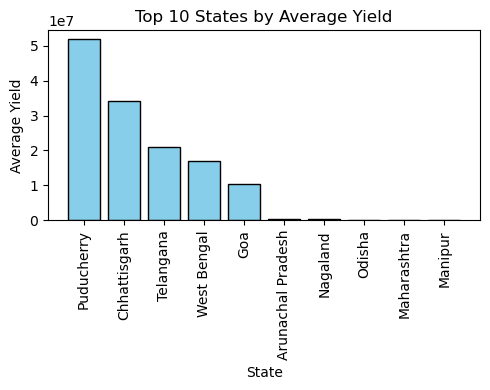

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping by State and calculating average yield
top10_yield_states = df.groupby("State")["Yield"].mean().sort_values(ascending=False).head(10).reset_index()

# Renaming columns for clarity
top10_yield_states.columns = ['State', 'Average_Yield']

# Storing the result back into the main df (if needed, otherwise use a new variable)
df_top10_yield = top10_yield_states.copy()

# Plotting
plt.figure(figsize=(5, 4))
plt.bar(df_top10_yield['State'], df_top10_yield['Average_Yield'], color='skyblue',edgecolor="black")
plt.title("Top 10 States by Average Yield")
plt.xlabel("State")
plt.ylabel("Average Yield")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### 🌾 Top 10 crop by Production

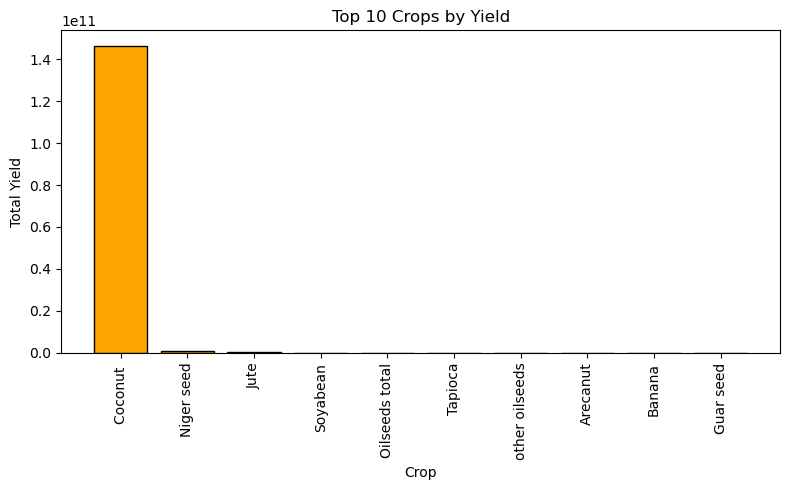

In [16]:
# Group by Crop and sum the Production
top10_crops_production = df.groupby("Crop")["Yield"].sum().sort_values(ascending=False).head(10).reset_index()

# Rename columns
top10_crops_production.columns = ['Crop', 'Yield']

# Plot
plt.figure(figsize=(8,5))
plt.bar(top10_crops_production['Crop'], top10_crops_production['Yield'], color='orange',edgecolor="black")
plt.title("Top 10 Crops by Yield")
plt.xlabel("Crop")
plt.ylabel("Total Yield")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


####  Average Yield Over the Years

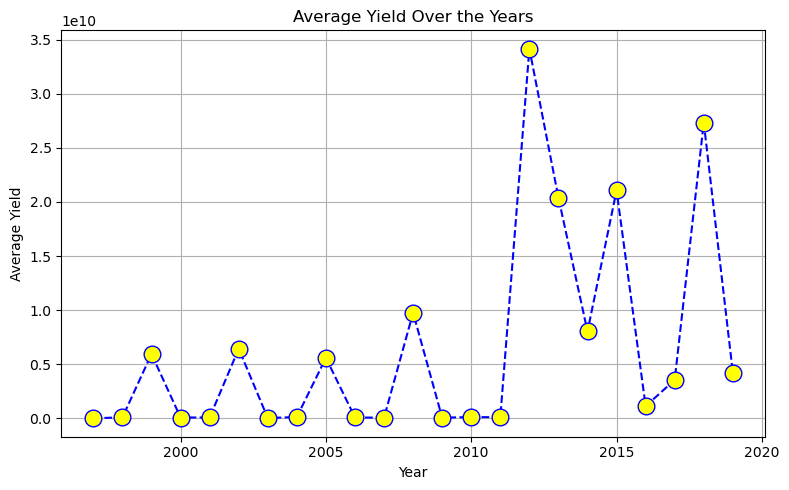

In [18]:
# Group by year and calculate average yield
df_state = df.groupby('Crop_Year',as_index=False)['Yield'].sum()

# Plotting the average yield over the years
plt.figure(figsize=(8, 5))
plt.plot(df_state['Crop_Year'], df_state['Yield'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.title("Average Yield Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Yield")
plt.grid(True)
plt.tight_layout()
plt.show()



#### Rainfall vs Yield
#### --→ Scatter plot to explore relationship between annual rainfall and yield.

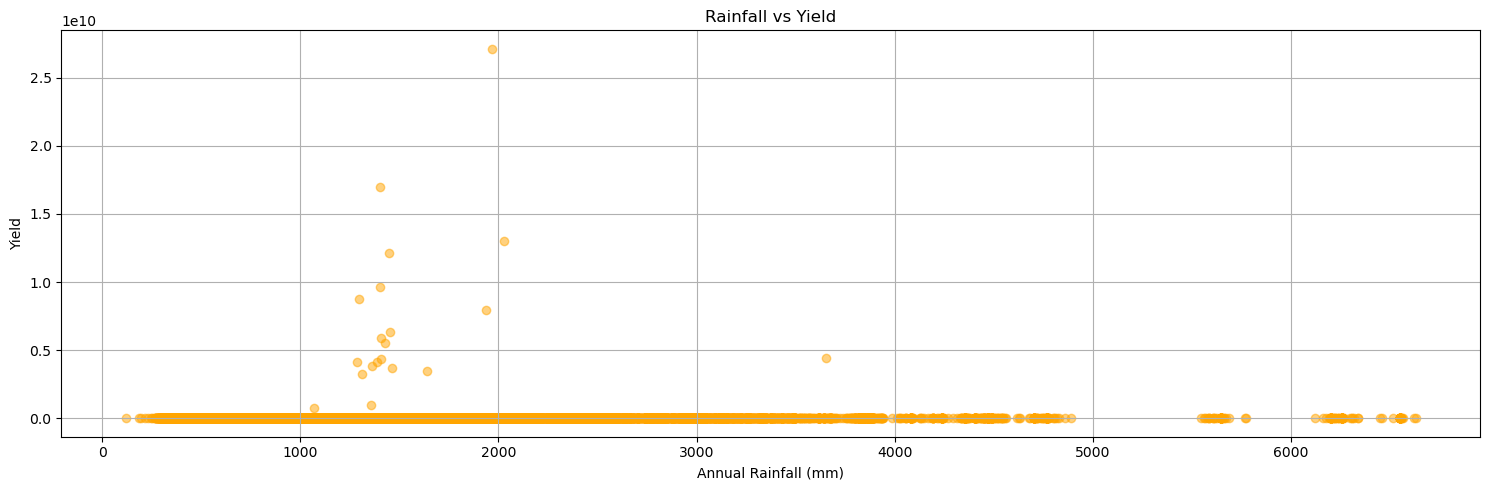

In [18]:
# Scatter plot: Rainfall vs Yield
plt.figure(figsize=(15, 5))
plt.scatter(df['Annual_Rainfall'], df['Yield'], alpha=0.5, color='orange')
plt.title("Rainfall vs Yield")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Yield")
plt.grid(True)
plt.tight_layout()
plt.show()


#### 🌾 Fertilizer vs Yield – Checks for efficiency in fertilizer usage.

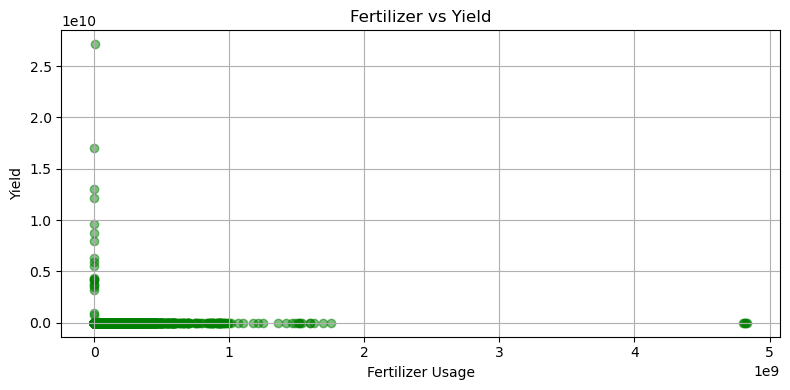

In [19]:
plt.figure(figsize=(8,4))
plt.scatter(df['Fertilizer'], df['Yield'], alpha=0.5, color='green')
plt.title("Fertilizer vs Yield")
plt.xlabel("Fertilizer Usage")
plt.ylabel("Yield")
plt.grid(True)
plt.tight_layout()
plt.show()


#### Fertilizer trend over year

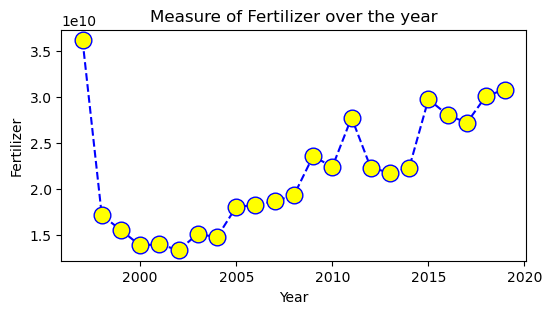

In [20]:
df_state = df.groupby('Crop_Year',as_index=False)['Fertilizer'].sum()
plt.figure(figsize = (6,3))
plt.plot(df_state['Crop_Year'], df_state['Fertilizer'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Measure of Fertilizer over the year')
plt.show()

#### 🐛 Pesticide vs Yield --> Examines potential overuse or underuse of pesticides.

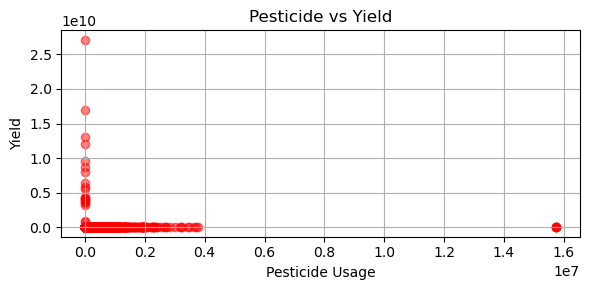

In [22]:
plt.figure(figsize=(6,3))
plt.scatter(df['Pesticide'], df['Yield'], alpha=0.5, color='red')
plt.title("Pesticide vs Yield")
plt.xlabel("Pesticide Usage")
plt.ylabel("Yield")
plt.grid(True)
plt.tight_layout()
plt.show()


#### 📅 Yield per Season --> Highlights seasonal differences in crop yield.



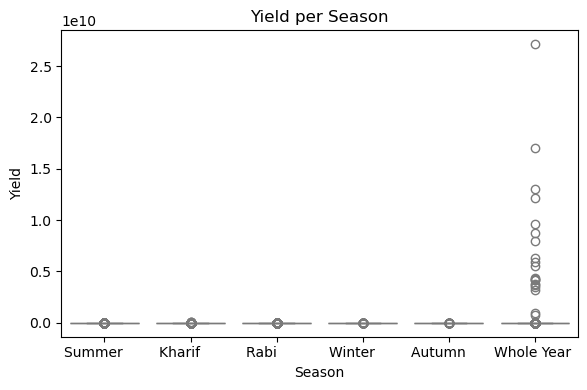

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Season', y='Yield', hue='Season', palette='Pastel1', legend=False)
plt.title("Yield per Season")
plt.xlabel("Season")
plt.ylabel("Yield")
plt.tight_layout()
plt.show()

#### 📌 Interpretation:
##### Some crops grown year-round (like sugarcane, bananas, or plantation crops) might have high and diverse yield values, which causes that spike in “Whole Year”.Other seasons might be mostly for cereal or pulse crops with lower average yields.



#### 🌍  Area vs Production

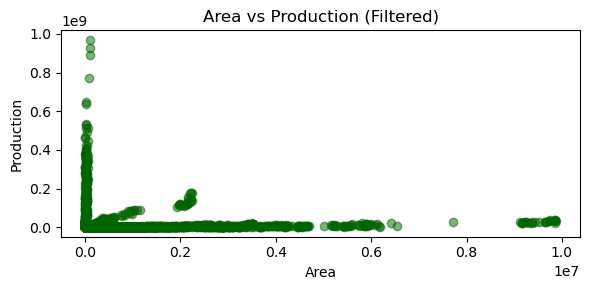

In [24]:
import matplotlib.pyplot as plt

# Filter out extreme values for clarity
filtered_df = df[(df['Area'] > 0) & (df['Area'] < 1e7) & (df['Production'] < 1e9)]

plt.figure(figsize=(6, 3))
plt.scatter(filtered_df['Area'], filtered_df['Production'], alpha=0.5, color='darkgreen')
plt.title("Area vs Production (Filtered)")
plt.xlabel("Area")
plt.ylabel("Production")
plt.tight_layout()
plt.show()


#### Production trend over year

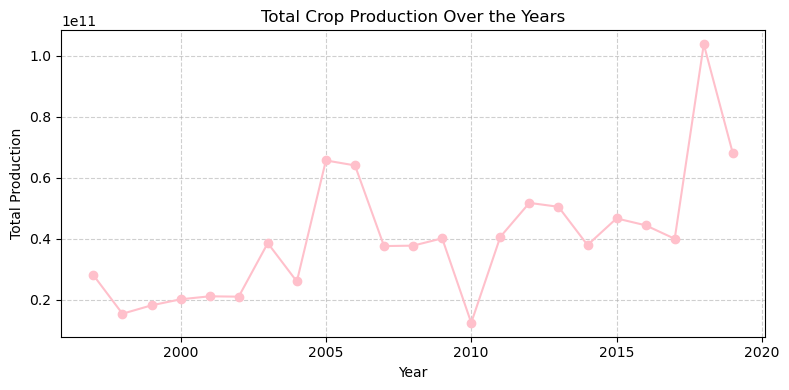

In [25]:
# Group by year and calculate total production
production_trend = df.groupby("Crop_Year")["Production"].sum()

# Plotting the trend
plt.figure(figsize=(8, 4))
plt.plot(production_trend.index, production_trend.values, marker='o', linestyle='-', color='pink')
plt.title("Total Crop Production Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Top 10 States by Production

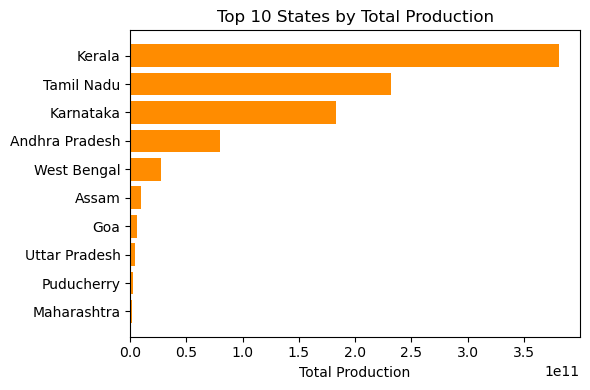

In [3]:
top_states_production = df.groupby('State')['Production'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(6, 4))
plt.barh(top_states_production['State'], top_states_production['Production'], color='darkorange')
plt.title("Top 10 States by Total Production")
plt.xlabel("Total Production")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### 🔥 Heatmap of Yield by State & Year – A detailed time-series overview across region

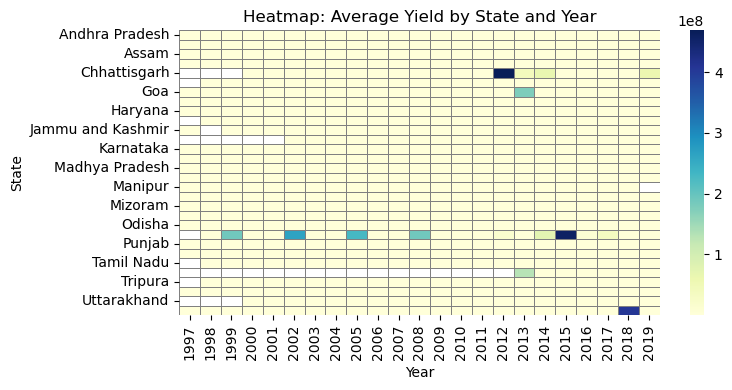

In [26]:
heatmap_data = df.groupby(['State', 'Crop_Year'])['Yield'].mean().unstack()

plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Heatmap: Average Yield by State and Year")
plt.xlabel("Year")
plt.ylabel("State")
plt.tight_layout()
plt.show()


#### 📈Production Trend of Top 3 Crops Over the Years --> Helps visualize how production changes over time for major crops.

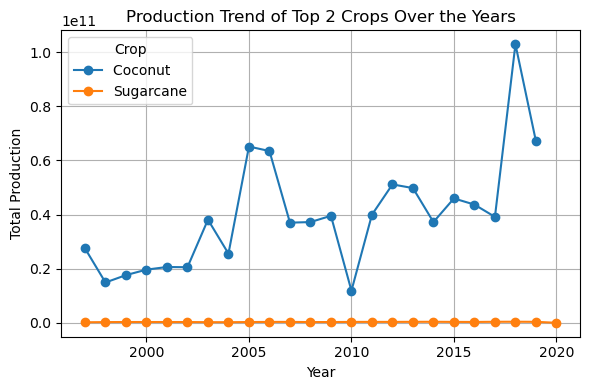

In [5]:
top_crops = df.groupby('Crop')['Production'].sum().nlargest(2).index
filtered = df[df['Crop'].isin(top_crops)]
crop_trends = filtered.groupby(['Crop_Year', 'Crop'])['Production'].sum().unstack()

crop_trends.plot(figsize=(6,4), marker='o')
plt.title("Production Trend of Top 2 Crops Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.grid(True)
plt.tight_layout()
plt.show()


#### Yield over the Year

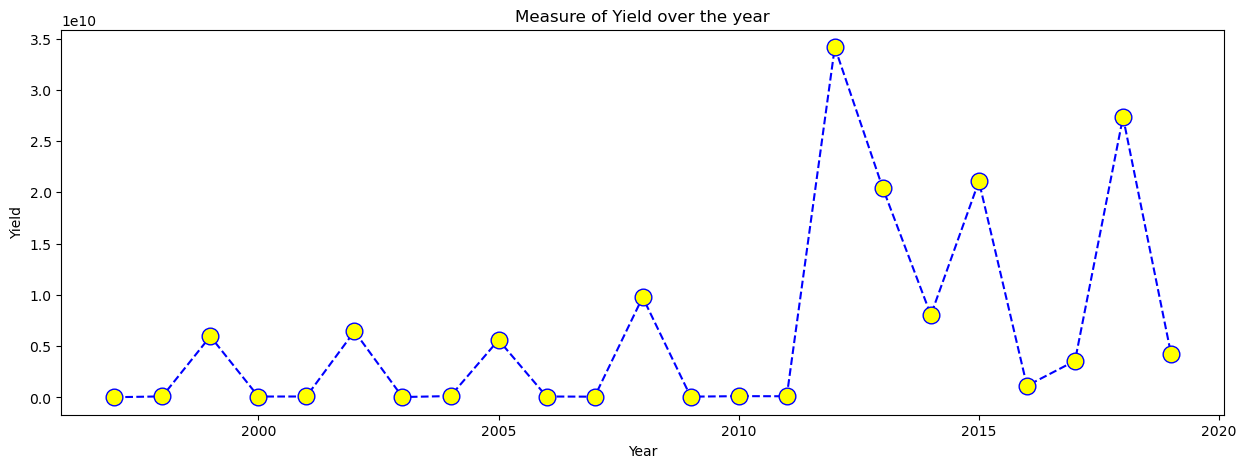

In [28]:
df_state = df.groupby('Crop_Year',as_index=False)['Yield'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Yield'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

#### PERFORMING LABEL ENCODING

#### 🌾 Crop 
##### It represent the type of crop that is going to be cultivated.

In [29]:
df1["Crop"].value_counts()

Crop
Rice                     600
Groundnut                599
Sesamum                  599
Sugarcane                599
Maize                    598
Moong(Green Gram)        598
Potato                   598
Urad                     598
Wheat                    544
Rapeseed &Mustard        527
Bajra                    524
Jowar                    513
Arhar/Tur                507
Safflower                500
Mesta                    500
Tapioca                  500
Coriander                500
Niger seed               500
Jute                     500
Coconut                  500
Khesari                  500
Arecanut                 500
Sannhamp                 500
Cowpea(Lobia)            500
Cashewnut                500
Black pepper             500
Sweet potato             500
Cardamom                 500
Banana                   500
Guar seed                500
Dry chillies             500
Castor seed              500
Linseed                  500
Ginger                   500
Cotton(li

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()  # creating object of LabelEncoder
df1["Crop"]=encoder.fit_transform(df1["Crop"])   # fit-->means learning from data and then tranforming it using transform
df1

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,17,2004,Summer,Maharashtra,69400.000000,100200.000000,1052.000000,7.518796e+06,14574.000000,1.313871e+00
1,17,2015,Summer,Gujarat,57421.000000,95577.000000,584.300000,9.067350e+06,18948.930000,1.685926e+00
2,17,2016,Kharif,Uttarakhand,935.000000,1214.000000,1580.900000,1.432888e+05,327.250000,1.296000e+00
3,17,2001,Kharif,Kerala,2437.000000,1812.000000,2946.700000,2.488908e+05,633.620000,7.400000e-01
4,17,2007,Kharif,Tripura,409.000000,423.000000,2831.800000,5.456060e+04,65.440000,1.087500e+00
...,...,...,...,...,...,...,...,...,...,...
25377,18,2019,Rabi,Andhra Pradesh,0.010000,18434.644974,893.733236,1.000000e-02,1580.736011,1.843464e+06
25378,18,2006,Whole Year,Uttar Pradesh,0.010000,56336.986798,566.544820,5.000957e+05,0.010000,5.633699e+06
25379,18,2012,Whole Year,Gujarat,219694.157535,143525.202754,451.584845,3.046479e+07,64245.162383,6.532955e-01
25380,18,2016,Kharif,Punjab,30824.116478,0.010000,621.052070,4.980096e+06,13438.340489,3.244213e-07


In [31]:
from sklearn.preprocessing import LabelEncoder
encoder1=LabelEncoder()  # creating object of LabelEncoder
df1["State"]=encoder1.fit_transform(df1["State"])   # fit-->means learning from data and then tranforming it using transform
df1



,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,17,2004,Summer,15,69400.000000,100200.000000,1052.000000,7.518796e+06,14574.000000,1.313871e+00
1,17,2015,Summer,7,57421.000000,95577.000000,584.300000,9.067350e+06,18948.930000,1.685926e+00
2,17,2016,Kharif,28,935.000000,1214.000000,1580.900000,1.432888e+05,327.250000,1.296000e+00
3,17,2001,Kharif,13,2437.000000,1812.000000,2946.700000,2.488908e+05,633.620000,7.400000e-01
4,17,2007,Kharif,26,409.000000,423.000000,2831.800000,5.456060e+04,65.440000,1.087500e+00
...,...,...,...,...,...,...,...,...,...,...
25377,18,2019,Rabi,0,0.010000,18434.644974,893.733236,1.000000e-02,1580.736011,1.843464e+06
25378,18,2006,Whole Year,27,0.010000,56336.986798,566.544820,5.000957e+05,0.010000,5.633699e+06
25379,18,2012,Whole Year,7,219694.157535,143525.202754,451.584845,3.046479e+07,64245.162383,6.532955e-01
25380,18,2016,Kharif,22,30824.116478,0.010000,621.052070,4.980096e+06,13438.340489,3.244213e-07


#### 🌦️ What is a Season?
##### A season is a part of the year with specific weather conditions when the crop is grown.Types of season are :
##### 🌾 1. Rabi Season (Winter crops)
##### Sowing time: October–November  , Harvesting: March–April  , Needs: Less water, cool climate
##### Examples: Wheat 🌾, Mustard 🌻, Peas
##### 🌧️ 2. Kharif Season (Rainy season crops)
##### Sowing time: Start of monsoon (June–July),  Harvesting: September–October  , Needs: Lots of water, warm weather
##### Examples: Rice 🍚, Maize 🌽, Cotton, Groundnut
##### 🔥 3. Zaid Season (Short summer season)
##### Sowing time: Between Rabi and Kharif (March–April) ,  Harvesting: June , Needs: Hot weather + irrigation
##### Examples: Watermelon 🍉, Cucumber 🥒, Fodder crops
#####  In dataset , a season which name whole year is also included that represent tha crop, that can be grwon in any season.

In [32]:
# Clean the Season column: remove extra spaces and capitalize properly
df1["Season"] = df1["Season"].str.strip().str.title()


In [33]:
df1["Season"].value_counts()

Season
Kharif        9803
Rabi          6962
Whole Year    6953
Summer        1013
Autumn         332
Winter         319
Name: count, dtype: int64

In [34]:
encoder2=LabelEncoder()
df1["Season"]=encoder2.fit_transform(df1["Season"])

In [35]:
#import seaborn
#seaborn.violinplot(data=df1,x="Yield",y="Season")

In [36]:
df1

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,17,2004,3,15,69400.000000,100200.000000,1052.000000,7.518796e+06,14574.000000,1.313871e+00
1,17,2015,3,7,57421.000000,95577.000000,584.300000,9.067350e+06,18948.930000,1.685926e+00
2,17,2016,1,28,935.000000,1214.000000,1580.900000,1.432888e+05,327.250000,1.296000e+00
3,17,2001,1,13,2437.000000,1812.000000,2946.700000,2.488908e+05,633.620000,7.400000e-01
4,17,2007,1,26,409.000000,423.000000,2831.800000,5.456060e+04,65.440000,1.087500e+00
...,...,...,...,...,...,...,...,...,...,...
25377,18,2019,2,0,0.010000,18434.644974,893.733236,1.000000e-02,1580.736011,1.843464e+06
25378,18,2006,4,27,0.010000,56336.986798,566.544820,5.000957e+05,0.010000,5.633699e+06
25379,18,2012,4,7,219694.157535,143525.202754,451.584845,3.046479e+07,64245.162383,6.532955e-01
25380,18,2016,1,22,30824.116478,0.010000,621.052070,4.980096e+06,13438.340489,3.244213e-07


#### --> converting fertilizer and yield to normal form from scientific form

In [37]:
df1['Fertilizer'] = df1['Fertilizer'].apply(lambda x: '{:.2f}'.format(float(x)))



In [38]:
df1['Yield'] = df1['Yield'].apply(lambda x: '{:.4f}'.format(x))

In [39]:
df1

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,17,2004,3,15,69400.000000,100200.000000,1052.000000,7518796.00,14574.000000,1.3139
1,17,2015,3,7,57421.000000,95577.000000,584.300000,9067350.11,18948.930000,1.6859
2,17,2016,1,28,935.000000,1214.000000,1580.900000,143288.75,327.250000,1.2960
3,17,2001,1,13,2437.000000,1812.000000,2946.700000,248890.81,633.620000,0.7400
4,17,2007,1,26,409.000000,423.000000,2831.800000,54560.60,65.440000,1.0875
...,...,...,...,...,...,...,...,...,...,...
25377,18,2019,2,0,0.010000,18434.644974,893.733236,0.01,1580.736011,1843464.4974
25378,18,2006,4,27,0.010000,56336.986798,566.544820,500095.68,0.010000,5633698.6798
25379,18,2012,4,7,219694.157535,143525.202754,451.584845,30464794.88,64245.162383,0.6533
25380,18,2016,1,22,30824.116478,0.010000,621.052070,4980095.58,13438.340489,0.0000


#### ✅ Feature Selection
##### It is statistical method used to select import features based on their statistical meaning w.r.t. dependent features.

In [40]:
 df1.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [41]:
numeric=df1[["Area", "Annual_Rainfall", "Fertilizer", "Pesticide", "Crop_Year","Production","Yield"]]

In [42]:
categorical=df1[["Crop","Season","State"]]

#### Performing the Pearson correlation analysis:-
##### It measures the strength of relationship between two numeric columns. It produces a correlation coefficient that ranges from -1 to +1
##### +1 --> means perfect postive correlation
##### -1 --> means perfect negative correlation
##### 0 --> means no correlation¶

In [43]:
x=numeric.corr()
print(x)

                     Area  Annual_Rainfall  Fertilizer  Pesticide  Crop_Year  \
Area             1.000000        -0.056696    0.973109   0.987869  -0.039911   
Annual_Rainfall -0.056696         1.000000   -0.069128  -0.049986  -0.017578   
Fertilizer       0.973109        -0.069128    1.000000   0.960110  -0.007272   
Pesticide        0.987869        -0.049986    0.960110   1.000000  -0.021233   
Crop_Year       -0.039911        -0.017578   -0.007272  -0.021233   1.000000   
Production       0.045679         0.044892    0.056279   0.042046   0.012777   
Yield           -0.003504         0.005354   -0.003682  -0.003041   0.011446   

                 Production     Yield  
Area               0.045679 -0.003504  
Annual_Rainfall    0.044892  0.005354  
Fertilizer         0.056279 -0.003682  
Pesticide          0.042046 -0.003041  
Crop_Year          0.012777  0.011446  
Production         1.000000  0.004663  
Yield              0.004663  1.000000  


<Axes: >

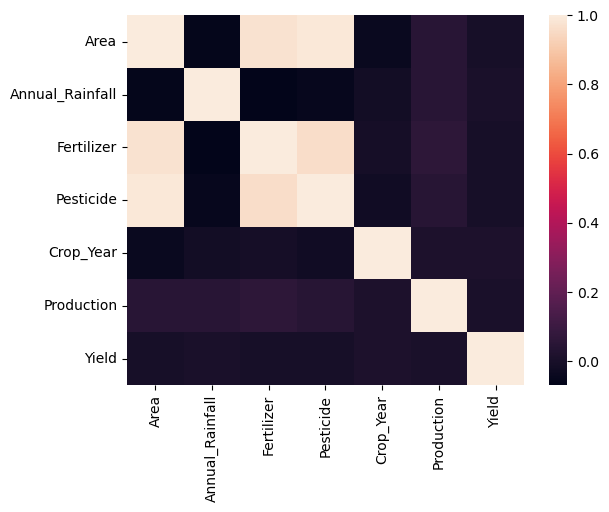

In [44]:
import seaborn
seaborn.heatmap(x)

#### ANOVA Test
##### It is used to find the "f-score" that is used to check if there is any relationship between the categorical and numerical column.Columns with highest f-score are considered as best(or having best relationship with the target.

In [45]:
from sklearn.feature_selection import f_classif, SelectKBest
select=SelectKBest(f_classif,k=2)
column=select.fit_transform(categorical,numeric["Yield"])
selected=select.get_support(indices=True)
print(selected)
print(categorical.columns)
print(select.scores_)

[1 2]
Index(['Crop', 'Season', 'State'], dtype='object')
[1.1334354 1.4553874 1.1863427]


In [46]:
#### Outlier Detection
##### Outlier detection is the process of identifying data points that differ significantly from the rest of the data.These unusual points are called outliers.
##### Case 1: If column is normally distributed , we apply z-score method.
##### Case 1: If column is randomly distributed , we use DBSCAN

In [47]:
#numeric.columns

In [48]:
#numeric.info()

####  -->  converting fertilizer datatype to float

In [49]:
numeric["Fertilizer"]=numeric["Fertilizer"].astype("float")

C:\Users\KOMAL\AppData\Local\Temp\ipykernel_25396\4089814753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric["Fertilizer"]=numeric["Fertilizer"].astype("float")


In [50]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25382 entries, 0 to 25381
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             25382 non-null  float64
 1   Annual_Rainfall  25382 non-null  float64
 2   Fertilizer       25382 non-null  float64
 3   Pesticide        25382 non-null  float64
 4   Crop_Year        25382 non-null  int64  
 5   Production       25382 non-null  float64
 6   Yield            25382 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 1.4+ MB


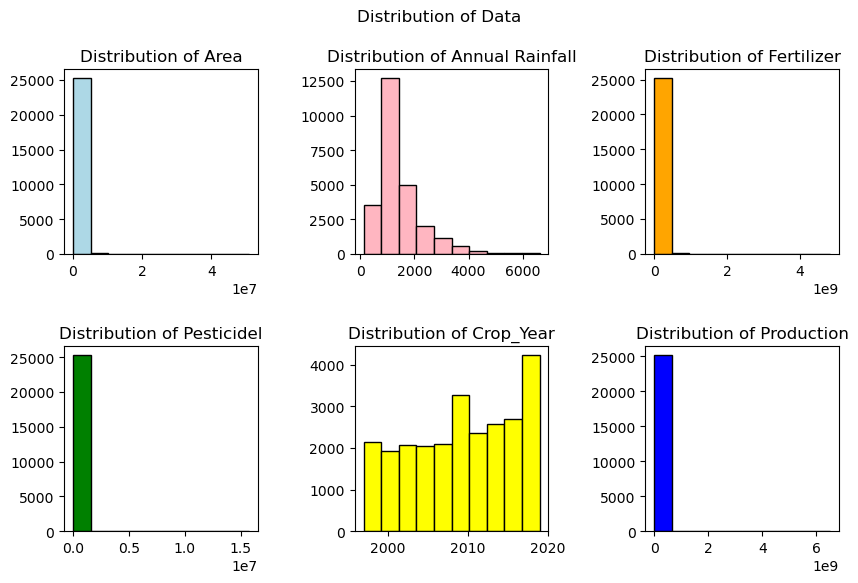

In [51]:
#### Plotting histogram to check the distribution of data for each column
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
plt.hist(numeric["Area"],color="lightblue",edgecolor="black")
plt.title("Distribution of Area")

plt.subplot(2,3,2)
plt.hist(numeric["Annual_Rainfall"],color="lightpink",edgecolor="black")
plt.title("Distribution of Annual Rainfall")

plt.subplot(2,3,3)
plt.hist(numeric["Fertilizer"],color="Orange",edgecolor="black")
plt.title("Distribution of Fertilizer")

plt.subplot(2,3,4)
plt.hist(numeric["Pesticide"],color="green",edgecolor="black")
plt.title("Distribution of Pesticidel")

plt.subplot(2,3,5)
plt.hist(numeric["Crop_Year"],color="yellow",edgecolor="black")
plt.title("Distribution of Crop_Year")

plt.subplot(2,3,6)
plt.hist(numeric["Production"],color="blue",edgecolor="black")
plt.title("Distribution of Production")


plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.suptitle("Distribution of Data")
plt.show()

##### here column--> Area,Annual Rainfall ,Pesticide is basically having normal distribution , so we will use Z-score method

In [52]:
numeric.shape, categorical.shape

((25382, 7), (25382, 3))

In [53]:
# Confirm both have same index
# print(numeric.index.equals(categorical.index))  # Should be True

# # Outlier mask
# def outlier_mask(x):
#     mean = x.mean()
#     std = x.std()
#     z = (x - mean) / std
#     return (z > -3) & (z < 3)

# a = outlier_mask(numeric["Area"])
# r = outlier_mask(numeric["Annual_Rainfall"])
# f = outlier_mask(numeric["Fertilizer"])
# p = outlier_mask(numeric["Pesticide"])

# non_outlier = a & f & p & r

# # ✅ Apply mask after confirming same index
# numeric_1 = numeric[non_outlier]
# categorical_1 = categorical[non_outlier]

# print(numeric_1.shape)
# print(categorical_1.shape)


In [54]:
#numeric_1.shape

In [55]:
#categorical_1.shape

In [56]:
#### ✅ For randomly Distributed column that is Crop Year we will use DBSCAN


In [57]:
#numeric_1.shape

In [58]:
# from sklearn.preprocessing import MinMaxScaler
# data=numeric_1[["Crop_Year","Production"]]
# scaler= MinMaxScaler()
# data=scaler.fit_transform(data)

In [59]:
# from sklearn.neighbors import NearestNeighbors
# from kneed import KneeLocator
# import numpy as np
# neighbors = NearestNeighbors(n_neighbors=10)  
# neighbors_fit = neighbors.fit(data)
# distances, indices = neighbors_fit.kneighbors(data)

# # Step 2: Sort the distances for each point and get the distance of the 4th neighbor (k=4)
# distances = np.sort(distances[:, 1], axis=0)  # 4th neighbor
# plt.plot(distances)
# plt.title('k-distance Graph')
# plt.xlabel('Data Points')
# plt.ylabel('Distance to 4th nearest neighbor')
# plt.show()

# # Step 3: Apply Kneedle to find the "elbow" point
# kneedle = KneeLocator(range(1, len(distances) + 1), distances, curve='convex', direction='increasing')

# # The elbow point (optimal eps) can be found here
# optimal_eps = distances[kneedle.elbow]

# print(f"Optimal eps value: {optimal_eps}")

In [60]:
# import numpy as np
# from sklearn.cluster import DBSCAN
# dbscan=DBSCAN(eps=0.00738,min_samples=15)  # Apply DBSCAN clustering
# dbscan.fit_predict(data)
# labels=dbscan.labels_    # Get labels assigned to each data point
# print(np.unique(labels))   # This shows the distinct clusters and outliers

# print(np.unique(labels,return_counts=True)) # Shows how many points are in each cluster or marked as noise

# # -1 → Noise / Outliers
# # 0, 1, 2, ... → Cluster labels

In [61]:
# numeric_1.shape,categorical_1.shape

In [62]:
# f=labels!=-1  # filtering rows whose label=-1 i.e. dropping them
# numeric_1=numeric_1[f]
# categorical_1=categorical_1[f]
# numeric_1.shape,categorical_1.shape

#### Concatenating the numeric and categorical column

In [63]:
df_final=pd.concat((numeric,categorical),axis=1)
df_final

,Area,Annual_Rainfall,Fertilizer,Pesticide,Crop_Year,Production,Yield,Crop,Season,State
0,69400.000000,1052.000000,7518796.00,14574.000000,2004,100200.000000,1.3139,17,3,15
1,57421.000000,584.300000,9067350.11,18948.930000,2015,95577.000000,1.6859,17,3,7
2,935.000000,1580.900000,143288.75,327.250000,2016,1214.000000,1.2960,17,1,28
3,2437.000000,2946.700000,248890.81,633.620000,2001,1812.000000,0.7400,17,1,13
4,409.000000,2831.800000,54560.60,65.440000,2007,423.000000,1.0875,17,1,26
...,...,...,...,...,...,...,...,...,...,...
25377,0.010000,893.733236,0.01,1580.736011,2019,18434.644974,1843464.4974,18,2,0
25378,0.010000,566.544820,500095.68,0.010000,2006,56336.986798,5633698.6798,18,4,27
25379,219694.157535,451.584845,30464794.88,64245.162383,2012,143525.202754,0.6533,18,4,7
25380,30824.116478,621.052070,4980095.58,13438.340489,2016,0.010000,0.0000,18,1,22


In [64]:
df_final=df_final.drop(columns="Yield",axis=1)

In [65]:
x=df_final.drop(columns="Production",axis=1)  #independent feature
x
y=df_final["Production"] #dependent feature
y

0        100200.000000
1         95577.000000
2          1214.000000
3          1812.000000
4           423.000000
             ...      
25377     18434.644974
25378     56336.986798
25379    143525.202754
25380         0.010000
25381     24622.625751
Name: Production, Length: 25382, dtype: float64

#### Applying SCALING --> 
##### It is the process of adjusting the range of feature values so that they are on a similar scale.

In [66]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x=s.fit_transform(x)
x

array([[-0.08162373, -0.47078918, -0.11150601, ..., -0.51617029,
         0.61410992,  0.0915992 ],
       [-0.09510777, -1.02313847, -0.09606868, ..., -0.51617029,
         0.61410992, -0.79868259],
       [-0.15869067,  0.15383673, -0.18503148, ..., -0.51617029,
        -0.94673101,  1.53830711],
       ...,
       [ 0.0875534 , -1.17987382,  0.11723967, ..., -0.44535249,
         1.39453039, -0.79868259],
       [-0.12504629, -0.97973462, -0.13681399, ..., -0.44535249,
        -0.94673101,  0.87059577],
       [-0.12182335, -1.28652258, -0.1589207 , ..., -0.44535249,
         1.39453039,  0.87059577]])

#### Splitting data to training and testing
##### --> It's the process of dividing your dataset into two parts:
##### Training Set: Used to train the model (the model "learns" from this).
##### Test Set: Used to evaluate the model's performance on unseen data.


In [67]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [68]:
x_train

array([[-0.15194694,  0.12483548, -0.18645991, ..., -1.72007286,
         1.39453039,  1.64959233],
       [-0.13010504,  0.30807409, -0.15802279, ...,  0.68773228,
        -0.16631055,  0.5367401 ],
       [-0.15875483, -0.8316999 , -0.18513861, ..., -1.64925506,
        -0.16631055,  1.20445144],
       ...,
       [-0.09220474, -0.5691657 , -0.09626158, ..., -1.57843726,
        -0.94673101, -1.57767916],
       [-0.12503291, -0.98522867, -0.1400548 , ...,  1.46672806,
        -0.16631055,  1.42702189],
       [ 0.74525795, -0.90114215,  1.02346213, ..., -0.51617029,
        -0.94673101, -1.57767916]])

#### Step 4: M0DEL SELECTION

#### 1. Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=10,min_samples_split=3)  ### no. of levels to split the data into.
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
print(y_pred)

[8652.5873039  8652.5873039   700.4471231  ... 3089.78882642 8652.5873039
  700.4471231 ]


In [71]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score for Decision Tree Model:", r2)
print("Mean Squared Error (MSE) for Decision Tree Model:", mse)
print("Mean Absolute Error (MAE) for Decision Tree Model:", mae)
print("Root Mean Squared Error (RMSE) for Decision Tree Model:", rmse)


R² Score for Decision Tree Model: 0.9919424958064798
Mean Squared Error (MSE) for Decision Tree Model: 1107577079699292.0
Mean Absolute Error (MAE) for Decision Tree Model: 2534733.7563310075
Root Mean Squared Error (RMSE) for Decision Tree Model: 33280280.64333731


#### 2. Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=3, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Print evaluation metrics
print("R² Score for Random Forest Model:", r2_rf)
print("Mean Squared Error (MSE) for Random Forest Model:", mse_rf)
print("Mean Absolute Error (MAE) for Random Forest Model:", mae_rf)
print("Root Mean Squared Error (RMSE) for Random Forest Model:", rmse_rf)


R² Score for Random Forest Model: 0.996278393731127
Mean Squared Error (MSE) for Random Forest Model: 511568558212326.3
Mean Absolute Error (MAE) for Random Forest Model: 2373353.2387533835
Root Mean Squared Error (RMSE) for Random Forest Model: 22617881.382046513


#### 3. KNN( K- Nearest Neighbors)

In [73]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(x_test)

# Evaluate the model
r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

# Print evaluation metrics
print("R² Score for KNN Model:", r2_knn)
print("Mean Squared Error (MSE) for KNN Model:", mse_knn)
print("Mean Absolute Error (MAE) for KNN Model:", mae_knn)
print("Root Mean Squared Error (RMSE) for KNN Model:", rmse_knn)


R² Score for KNN Model: 0.9561493820488478
Mean Squared Error (MSE) for KNN Model: 6027665416842629.0
Mean Absolute Error (MAE) for KNN Model: 7691994.196823876
Root Mean Squared Error (RMSE) for KNN Model: 77638041.04202159


#### We found that random forest regressor is giving us higher accuracy, so we will use random forest model

#### STEP 5: HYPERPARAMTER TUNNING
##### Hyperparameter tuning is the process of optimizing the configuration settings (called hyperparameters) of a machine learning model to get the best performance (like highest accuracy or lowest error).
##### As we are already getting highest accuracy so we will perform hyperparameter manually.


In [74]:
model1=RandomForestRegressor(n_estimators=100, min_samples_split=5, max_depth=10)

In [75]:
# Fit the model on training data after cross-validation
model1.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5)

In [76]:
y_pred=model1.predict(x_test)

In [77]:
 print(r2_score(y_test,y_pred))

0.9954318643647049


#### Creating Function to take input from user and make prediction

In [78]:
def predict_crop_yield_user_input(encoder, encoder1, encoder2, scaler, model):
    # Take inputs from user
    Area = float(input("Enter Area (in hectares): "))
    Annual_Rainfall = float(input("Enter Annual Rainfall (in mm): "))
    Fertilizer = float(input("Enter Fertilizer used (in kg): "))
    Pesticide = float(input("Enter Pesticide used (in kg): "))
    Crop_Year = int(input("Enter Crop Year (e.g. 2022): "))
    Crop = input("Enter Crop name (e.g. Rice): ")
    Season = input("Enter Season (e.g. Kharif): ")
    State = input("Enter State (e.g. Karnataka): ")

    # Create DataFrame
    input_data = pd.DataFrame([{
        'Area': Area,
        'Annual_Rainfall': Annual_Rainfall,
        'Fertilizer': Fertilizer,
        'Pesticide': Pesticide,
        'Crop_Year': Crop_Year,
        'Crop': Crop,
        'Season': Season,
        'State': State
    }])

    # Encode categorical features
    input_data['Crop'] = encoder.transform(input_data[['Crop']])
    input_data['State'] = encoder1.transform(input_data[['State']])
    input_data['Season'] = encoder2.transform(input_data[['Season']])

    # Scale features
    scaled_data = scaler.transform(input_data)

    # Predict
    prediction = model.predict(scaled_data)
    area = input_data['Area'].values[0]
    yields = prediction[0] / area

    print(f"\n✅ Predicted Crop Production will be: {prediction[0]:.2f} kg")
    print("Predicted Crop Yield will be :",yields,"kg/ha")
    
predict_crop_yield_user_input(encoder, encoder1, encoder2, s, model1)

Enter Area (in hectares):  2345
Enter Annual Rainfall (in mm):  63513
Enter Fertilizer used (in kg):  12313
Enter Pesticide used (in kg):  231
Enter Crop Year (e.g. 2022):  2023
Enter Crop name (e.g. Rice):  Rice
Enter Season (e.g. Kharif):  Rabi
Enter State (e.g. Karnataka):  Karnataka



✅ Predicted Crop Production will be: 4915.61 kg
Predicted Crop Yield will be : 2.0962073724628087 kg/ha


C:\Users\KOMAL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\KOMAL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\KOMAL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [79]:
# import pickle

# with open('model.pkl', 'wb') as f_model:
#     pickle.dump(model1, f_model)

# with open('scaler.pkl', 'wb') as f_scaler:
#     pickle.dump(s, f_scaler)

# print("✅ Model and scaler saved as 'model.pkl' and 'scaler.pkl'")


In [80]:
# Save model and scaler using joblib
import joblib

joblib.dump(model1, 'model1.pkl')
joblib.dump(s, 'scaler1.pkl')

['scaler1.pkl']

In [81]:
joblib.dump(encoder, 'crop_encoder.pkl')
joblib.dump(encoder1, 'state_encoder.pkl')
joblib.dump(encoder2, 'season_encoder.pkl')

['season_encoder.pkl']